In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [43]:
df = pd.read_csv('Loan_Data.csv')
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [44]:
# Check for duplicate customers
print(f'Number of rows: {len(df)}')
print(f'Number of unique ids: {df['customer_id'].nunique()}')

Number of rows: 10000
Number of unique ids: 10000


In [45]:
# Check for class imbalance 
default = df[df['default'] == 1]
non_default = df[df['default'] == 0]

print(f'Number of default cases: {len(default)}')
print(f'% of default cases: {len(default) / len(df) * 100}')
print(f'Number of non-default cases: {len(non_default)}')
print(f'% of non-default cases: {len(non_default) / len(df) * 100}')

# Possible solution: undersampling, tomek links, SMOTE, nearMiss

Number of default cases: 1851
% of default cases: 18.509999999999998
Number of non-default cases: 8149
% of non-default cases: 81.49


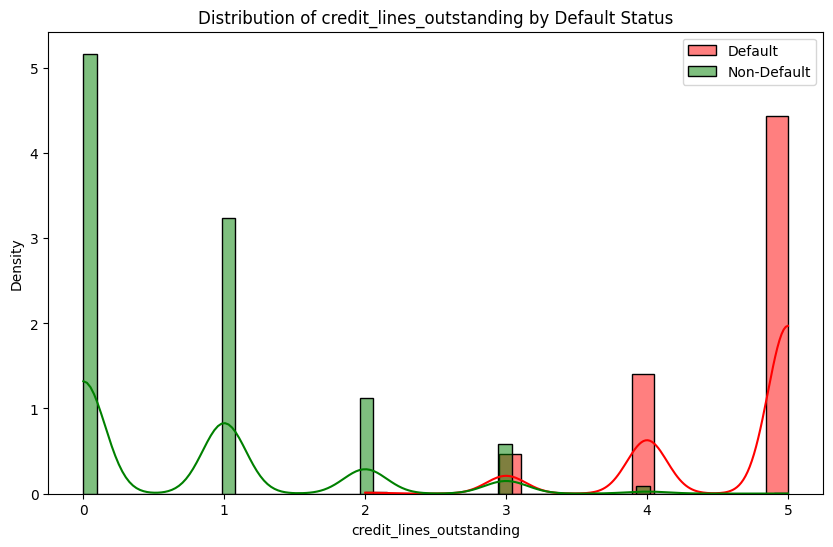

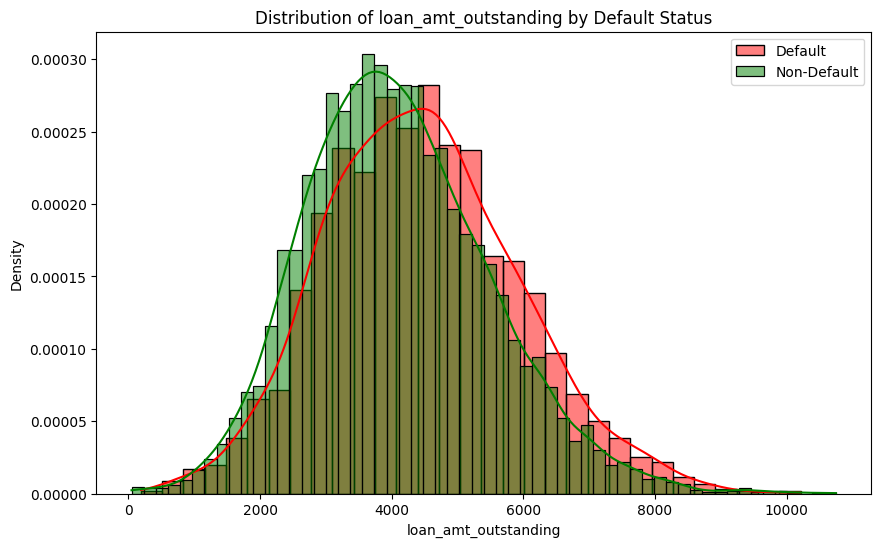

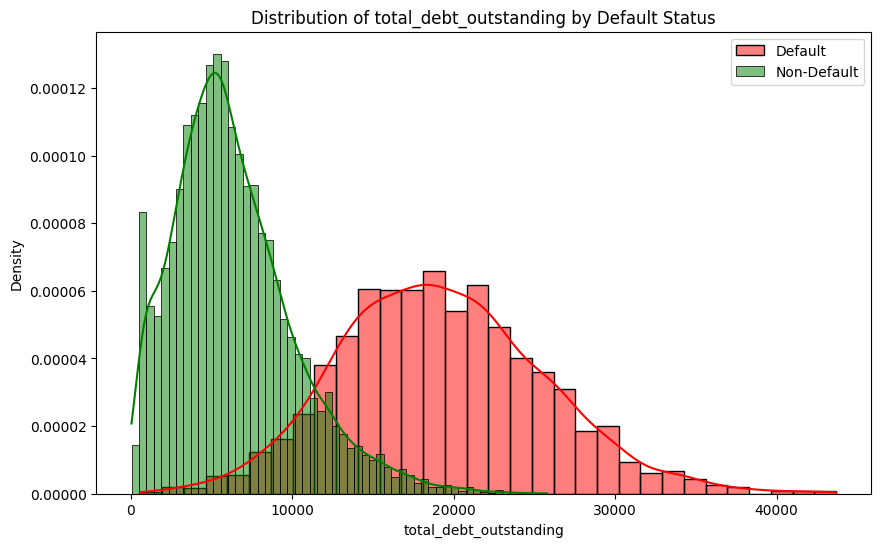

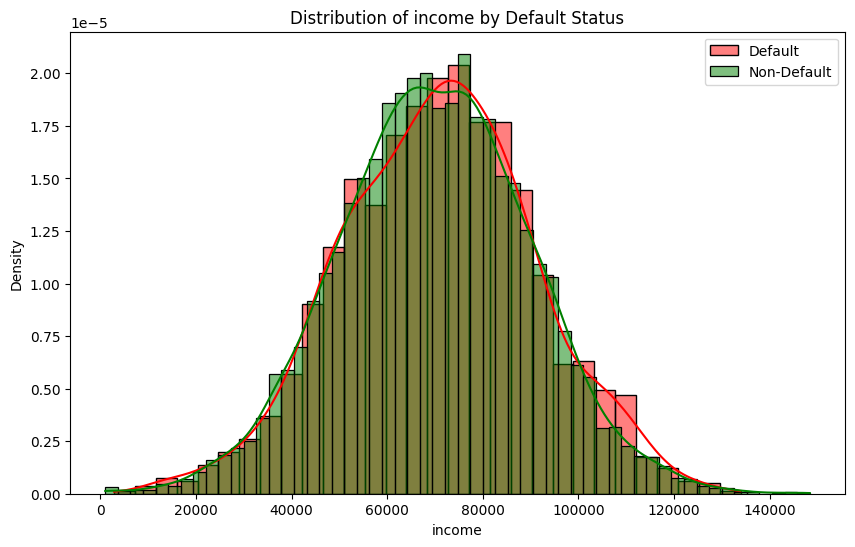

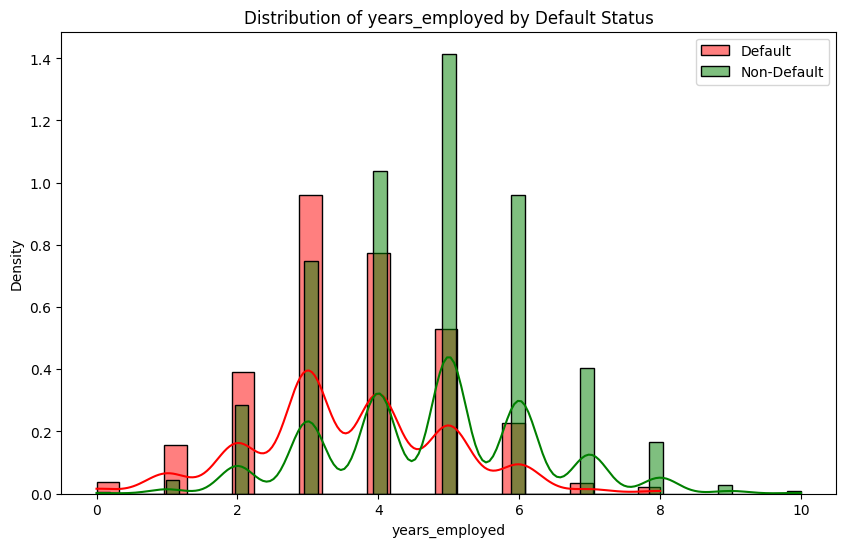

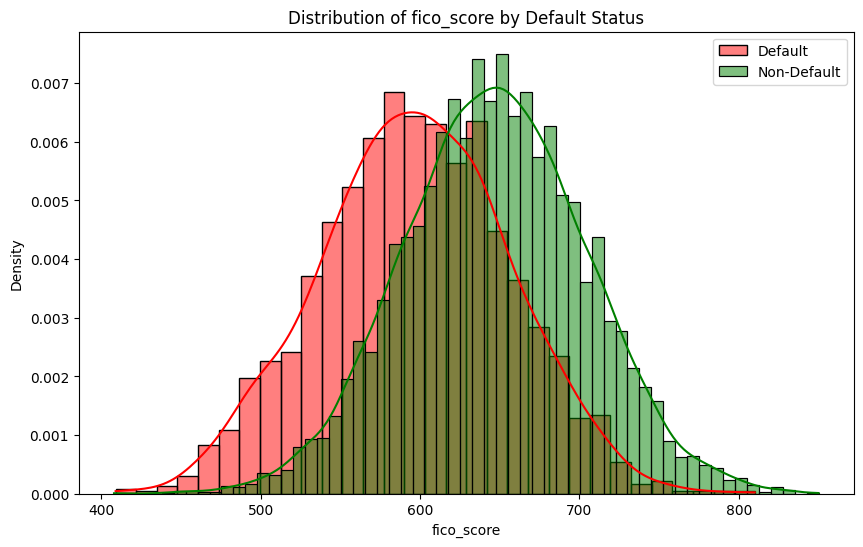

In [46]:
# List of feature columns to plot
feature_columns = df.columns.drop(['customer_id', 'default'])  # Drop the 'default' column

# All features are numerical, thus we can plot a historgram for each to check for differences between the 2 target groups
for feature in feature_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(default[feature], color='red', label='Default', kde=True, stat="density", common_norm=False)
    sns.histplot(non_default[feature], color='green', label='Non-Default', kde=True, stat="density", common_norm=False)
    
    plt.title(f'Distribution of {feature} by Default Status')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Possible distinctive features (shown by non-overlapping area): 
# ['credit_lines_outstanding', 'total_debt_outstanding', 'years_employed', 'fico_score']


In [8]:
# Possible models: log regression, random forest, SVM, NN, ensemble methods
# Evaluation metrics: precision, accuracy, recall, f1-score

In [48]:
selected_features = ['credit_lines_outstanding', 'total_debt_outstanding', 'years_employed', 'fico_score']
features, target = df[selected_features], df['default']

# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

In [49]:
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
    print(f'Precision: {precision_score(y_true, y_pred)}')
    print(f'Recall: {recall_score(y_true, y_pred)}')
    print(f'F1-score: {f1_score(y_true, y_pred)}')

Accuracy: 0.9942424242424243
Precision: 0.9898819561551433
Recall: 0.9783333333333334
F1-score: 0.9840737636211232
Accuracy: 0.9957575757575757
Precision: 0.9932659932659933
Recall: 0.9833333333333333
F1-score: 0.9882747068676717
Accuracy: 0.9303030303030303
Precision: 0.8425925925925926
Recall: 0.7583333333333333
F1-score: 0.7982456140350878


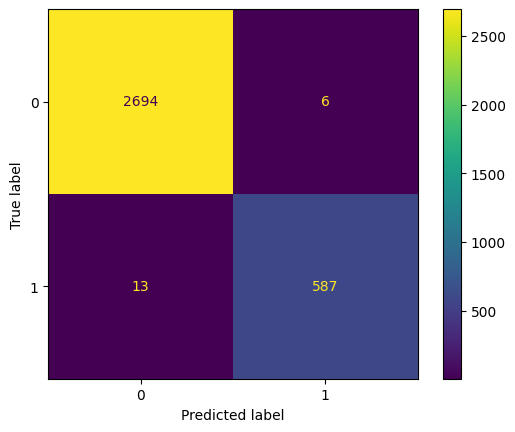

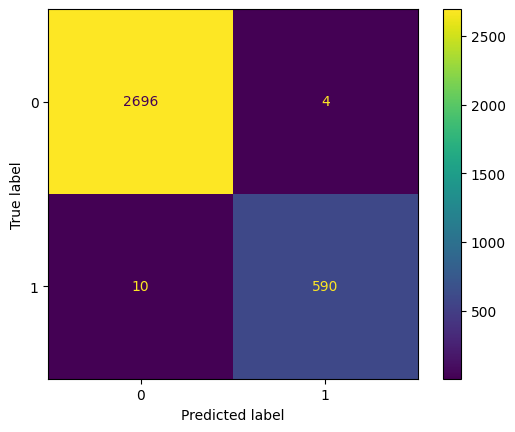

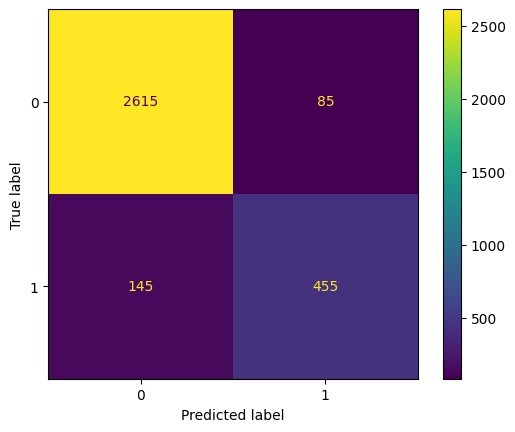

In [50]:
models = {
    'lr': LogisticRegression(random_state=0),
    'rf': RandomForestClassifier(), 
    'svm': svm.SVC().fit(X_train, y_train)
}

predictions = {}
for k,v in models.items():
    fitted_model = models[k].fit(X_train, y_train)
    y_pred = fitted_model.predict(X_test)

    # Save fitted model and predictions
    models[k] = fitted_model
    predictions[k] = y_pred

    # Evaluate predictions
    evaluate_model(y_test, y_pred, k)

# Feature selection seems to improve perfromance of all models. Especially for SVM. Data from inseparable to separable?

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [70]:
model = Sequential()
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=8,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [71]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=40,
          batch_size=512)


Epoch 1/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.6103 - loss: 30.0320
Epoch 2/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.7296 - loss: 5.2985
Epoch 3/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - accuracy: 0.8740 - loss: 1.5076
Epoch 4/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.9168 - loss: 0.8529
Epoch 5/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step - accuracy: 0.9267 - loss: 0.6641
Epoch 6/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.9285 - loss: 0.6052
Epoch 7/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.9332 - loss: 0.5639
Epoch 8/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 852us/step - accuracy: 0.9321 - loss: 0.5509
Epoch 9/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.9214 - loss: 0.6297
Epoch 10/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9197 - loss: 0.5614
Epoch 11/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - accuracy: 0.9151 - loss: 0.5745
Epoch 12/40
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 722us/ste

<Axes: >

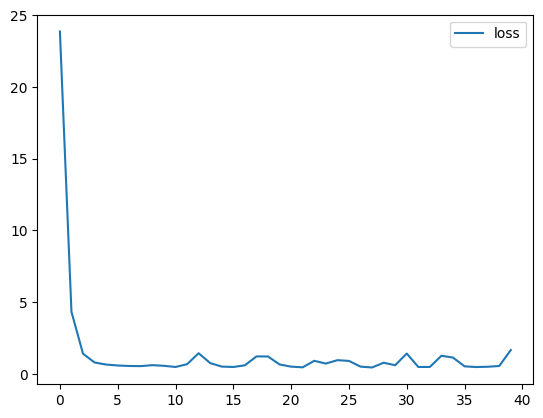

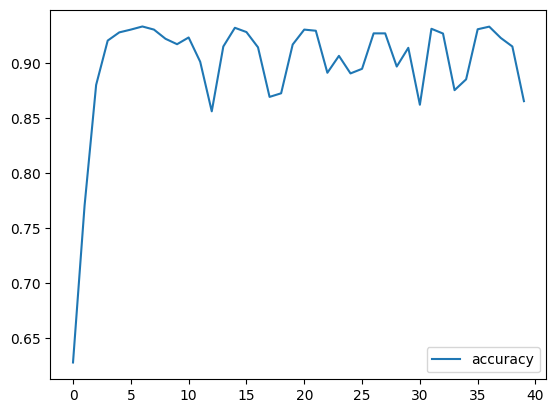

In [72]:
losses = pd.DataFrame(model.history.history)
losses[['loss']].plot()
losses[['accuracy']].plot()

In [73]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

print(classification_report(y_test, predictions))

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      2700
           1       0.67      0.93      0.78       600

    accuracy                           0.90      3300
   macro avg       0.83      0.91      0.86      3300
weighted avg       0.93      0.90      0.91      3300



In [74]:
pd.DataFrame(confusion_matrix(y_test, predictions))

,0,1
0,2428,272
1,43,557


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, EarlyStopping
from tensorflow.keras.layers import Dense, Input, InputLayer, Add, Concatenate, Dropout, BatchNormalization

LR_START = 0.01  #defines the learning rate
def my_model(n_inputs=len(features)):
    activation = 'swish'
    l1 = 1e-7
    l2 = 4e-4
    inputs = Input(shape=(n_inputs, ))
    x0 = BatchNormalization()(inputs)
    x0 = Dense(1024, 
               kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1,l2=l2),
              activation=activation,
             )(x0)
    x0 = Dropout(0.1)(x0)
    x = Dense(64, 
              kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1,l2=l2),
              activation=activation,
             )(x0)
    x = Dense(64, 
              kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1,l2=l2),
              activation=activation,
             )(x)
    x = Concatenate()([x, x0])
    x = Dropout(0.1)(x)
    x = Dense(16, 
              kernel_regularizer=tf.keras.regularizers.L1L2(l1=l1,l2=l2),
              activation=activation,
             )(x)
    x = Dense(1,
              activation='sigmoid',
             )(x)
    model = Model(inputs, x)
    model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=LR_START,clipvalue= 0.5,clipnorm = 1.0
                                                     ),loss=tf.keras.losses.BinaryCrossentropy())
    return model

In [53]:
from matplotlib import pyplot as plt
import random
import datetime
import math
from matplotlib.ticker import MaxNLocator
from colorama import Fore, Back, Style

# Cross-validation of the classifier
ONLY_FIRST_FOLD = True
EPOCHS_EXPONENTIALDECAY = 100
VERBOSE = 0 # set to 0 for less output, or to 2 for more output
LR_END = 1e-5 # minimum learning rate possible
CYCLES = 1 #define how many cycles are there in our learning rate
EPOCHS = 200 #total epochs
DIAGRAMS = True
USE_PLATEAU = False # set to True for early stopping, or to False for exponential learning rate decay
BATCH_SIZE = 2048

# Setting seeds for results reproducibility
np.random.seed(1)
random.seed(1)
tf.random.set_seed(1)

In [54]:
from sklearn.model_selection import StratifiedKFold, StratifiedGroupKFold
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder

''' function for scaling data, training of model and validting it
code ref: https://www.kaggle.com/code/ambrosm/amex-keras-quickstart-1-training
'''
def fit_model(X_tr, y_tr, X_va=None, y_va=None, fold=0, run=0):

    global y_va_pred
    gc.collect()
    start_time = datetime.datetime.now()
    
    scaler = StandardScaler()  #scales the training data
    X_tr = scaler.fit_transform(X_tr)
    
    if X_va is not None:
        X_va = scaler.transform(X_va)  #scales the validation data
        validation_data = (X_va, y_va)
    else:
        validation_data = None
    # Define the learning rate schedule and EarlyStopping
    if USE_PLATEAU and X_va is not None: # use early stopping
        epochs = EPOCHS
        lr = ReduceLROnPlateau(monitor="val_loss", factor=0.7,  # scheduler
                               patience=4, verbose=VERBOSE)
        es = EarlyStopping(monitor="val_loss",    #stop training if results does not improve for 12 epochs
                           patience=12, 
                           verbose=1,
                           mode="min", 
                           restore_best_weights=True)
        callbacks = [lr, es, tf.keras.callbacks.TerminateOnNaN()]

    else: # use exponential learning rate decay rather than early stopping
        epochs = EPOCHS_EXPONENTIALDECAY

        def exponential_decay(epoch):
            # v decays from e^a to 1 in every cycle
            # w decays from 1 to 0 in every cycle
            # epoch == 0                  -> w = 1 (first epoch of cycle)
            # epoch == epochs_per_cycle-1 -> w = 0 (last epoch of cycle)
            # higher a -> decay starts with a steeper decline
            # ref:
            a = 3
            epochs_per_cycle = epochs // CYCLES
            epoch_in_cycle = epoch % epochs_per_cycle
            if epochs_per_cycle > 1:
                v = math.exp(a * (1 - epoch_in_cycle / (epochs_per_cycle-1)))
                w = (v - 1) / (math.exp(a) - 1)
            else:
                w = 1
            return w * LR_START + (1 - w) * LR_END

        lr = LearningRateScheduler(exponential_decay, verbose=0)
        callbacks = [lr, tf.keras.callbacks.TerminateOnNaN()]
        
    # Construct and compile the model
    model = my_model(X_tr.shape[1])   #define and compile model
    # Train the model
    history = model.fit(X_tr, y_tr,    #fit model 
                        validation_data=validation_data, 
                        epochs=epochs,
                        verbose=VERBOSE,
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        callbacks=callbacks)
    del X_tr, y_tr
    with open(f"scaler_{fold}.pickle", 'wb') as f: pickle.dump(scaler, f)  #save standard scaler for real-time interaction 
    model.save(f"model_{fold}") #save model weights
    history_list.append(history.history)
    callbacks, es, lr, history = None, None, None, None
    

    lastloss = f"Training loss: {history_list[-1]['loss'][-1]:.4f} | Val loss: {history_list[-1]['val_loss'][-1]:.4f}"
        
        # Inference for validation
        y_va_pred = model.predict(X_va, batch_size=len(X_va), verbose=0).ravel()
        
        # Evaluation: Execution time, loss and metrics
        score = evaluation_metric(y_va, y_va_pred)
        print(f"{Fore.GREEN}{Style.BRIGHT}Fold {run}.{fold} | {str(datetime.datetime.now() - start_time)[-12:-7]}"
              f" | {len(history_list[-1]['loss']):3} ep"
              f" | {lastloss} | Score: {score:.5f}{Style.RESET_ALL}")
        score_list.append(score)
        
        if DIAGRAMS and fold == 0 and run == 0:
            # Plot training history
            plot_history(history_list[-1], 
                         title=f"Learning curve",
                         plot_lr=True)

        # Scale and predict
        y_pred_list.append(model.predict(scaler.transform(test), batch_size=128*1024, verbose=0).ravel())

IndentationError: unexpected indent (77879931.py, line 76)